# Methods

The bucketers of `skorecard` come with a handy list of methods for you to peek under the hood of the bucketer

In [1]:
from skorecard.datasets import load_uci_credit_card
from skorecard.bucketers import DecisionTreeBucketer

X, y = load_uci_credit_card(return_X_y=True)

specials = {"LIMIT_BAL": {"=50000": [50000],
                          "in [20000,30000]": [20000, 30000]}}

dt_bucketer = DecisionTreeBucketer(variables=['LIMIT_BAL'],
                                   specials=specials)
dt_bucketer.fit(X, y)

dt_bucketer.fit_transform(X, y).head()

,EDUCATION,MARRIAGE,LIMIT_BAL,BILL_AMT1
0,1,2,9,201800.0
1,2,2,1,80610.0
2,1,2,9,499452.0
3,1,1,3,450.0
4,2,1,9,56107.0


## .summary()

This gives the user a simple table of the columns and number of (pre)buckets generated by the bucketer. The information value and dtypes are also given

In [2]:
dt_bucketer.summary()

,column,num_prebuckets,num_buckets,IV_score,dtype
0,EDUCATION,not_prebucketed,not_bucketed,0.057606,int64
1,MARRIAGE,not_prebucketed,not_bucketed,0.016267,int64
2,LIMIT_BAL,not_prebucketed,13,0.178036,float64
3,BILL_AMT1,not_prebucketed,not_bucketed,2.915613,float64


## .bucket_table()

To look at the buckets in a more granular level, the `bucket_table()` method outputs, among others, a table containing the counts in each bin, the percentages, and the event rate.

In [3]:
dt_bucketer.bucket_table('LIMIT_BAL')

,bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV
0,-4,"Special: in [20000,30000]",723.0,12.05,453.0,270.0,0.373444,-0.724,-0.075
1,-3,Special: =50000,676.0,11.27,518.0,158.0,0.233728,-0.054,-0.000
2,-1,Missing,0.0,0.00,0.0,0.0,NaN,0.000,0.000
3,0,"[-inf, 75000.0)",462.0,7.70,313.0,149.0,0.322511,-0.499,-0.022
4,1,"[75000.0, 85000.0)",319.0,5.32,243.0,76.0,0.238245,-0.079,-0.000
5,2,"[85000.0, 105000.0)",330.0,5.50,241.0,89.0,0.269697,-0.245,-0.004
6,3,"[105000.0, 145000.0)",566.0,9.43,436.0,130.0,0.229682,-0.031,-0.000
7,4,"[145000.0, 175000.0)",449.0,7.48,380.0,69.0,0.153675,0.464,-0.014
8,5,"[175000.0, 225000.0)",769.0,12.82,630.0,139.0,0.180754,0.270,-0.009
9,6,"[225000.0, 275000.0)",501.0,8.35,419.0,82.0,0.163673,0.390,-0.011


## .plot_bucket()

We have already seen that we can plot the above bucket table for a better visualisation of the buckets

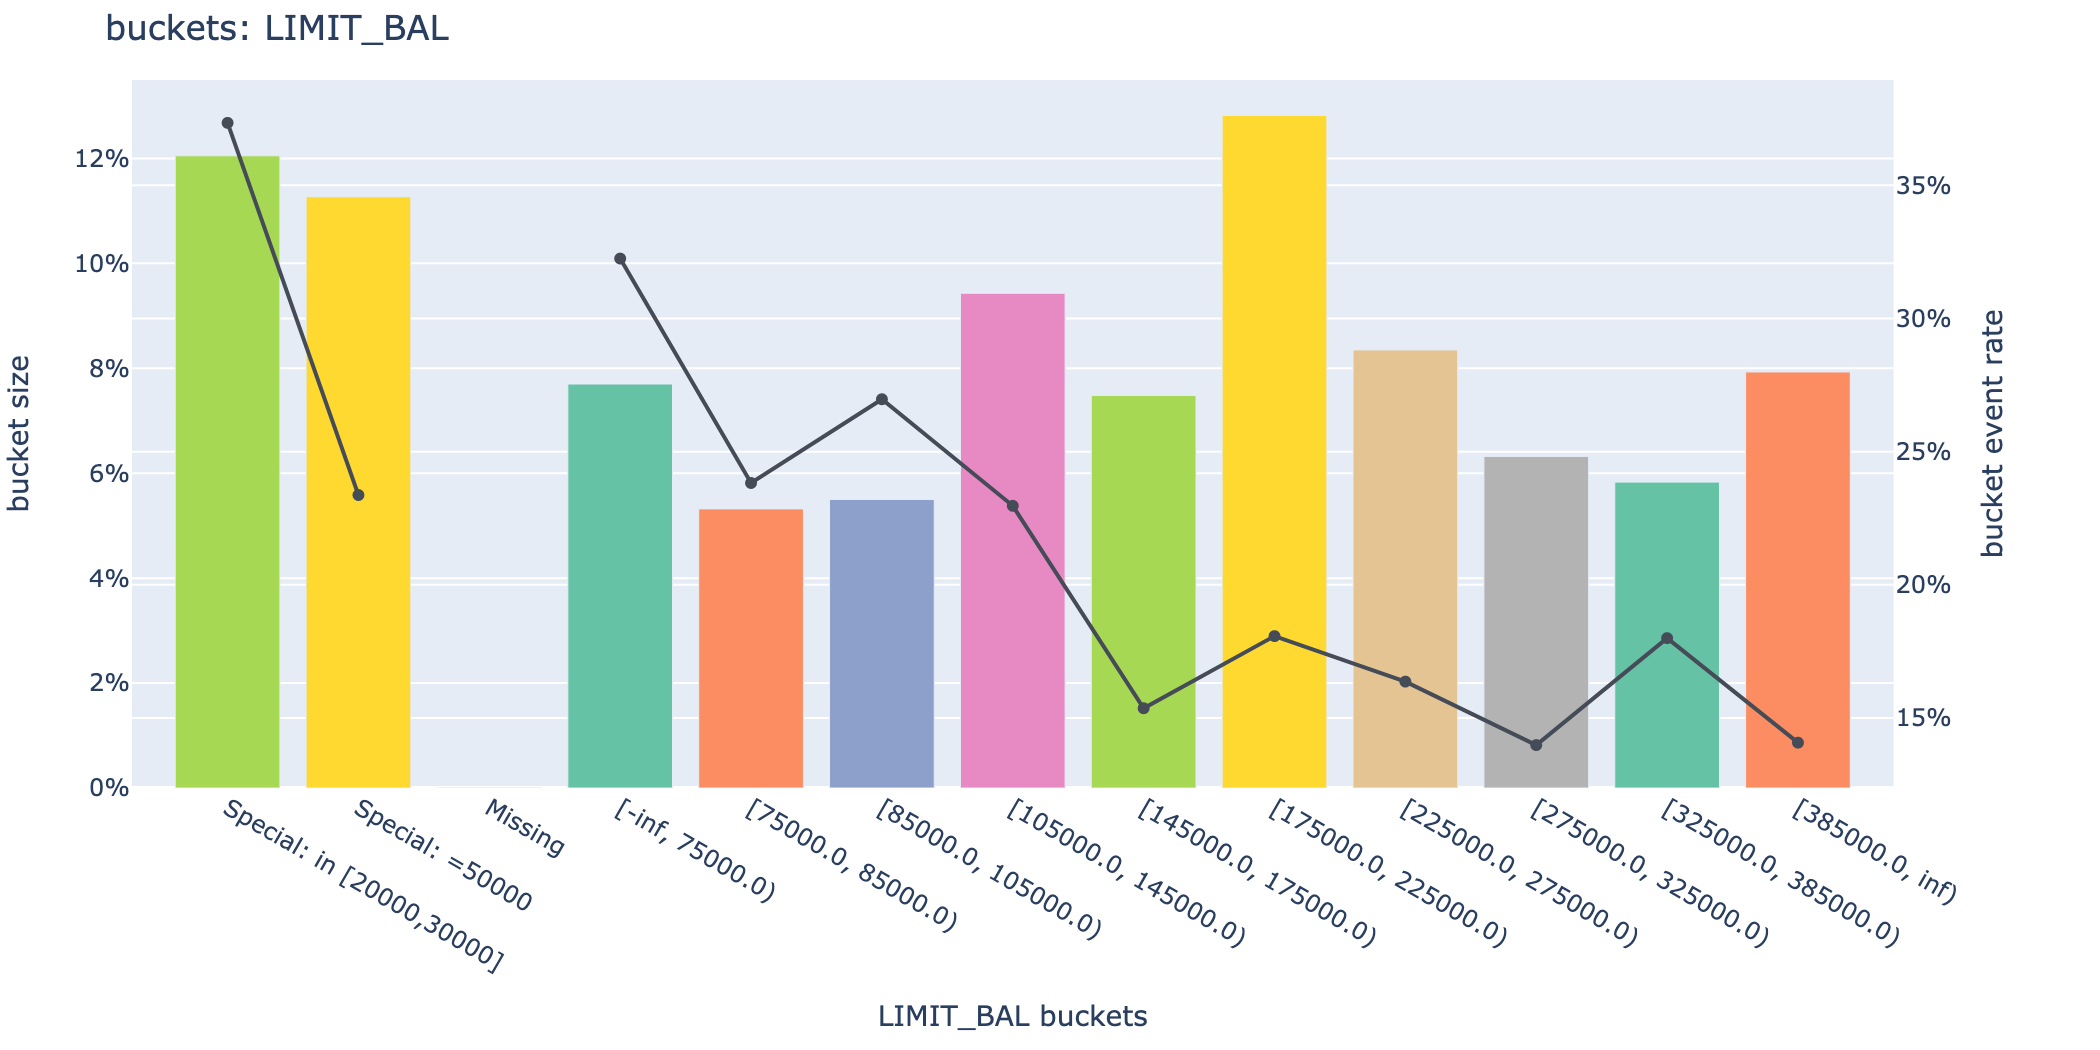

In [4]:
dt_bucketer.plot_bucket('LIMIT_BAL', format="png", scale=2, width=1050, height=525) # remove format argument for an interactive plotly plot.)

## save_yml()

We can save the generated bucket to a yaml file. This yaml file can later be used to generate a bucketer as we show in the `create_bucketer_from_file` tutorial

In [5]:
dt_bucketer.save_yml(open("my_output.yml","w"))

## Bucket mapping

If you're interested into digging into the internals of the buckets, you can access the fitted attribute
    `features_bucket_mapping_`. For example:

    ```python
    bucketer.features_bucket_mapping_.get('pet_ownership').labels
    # {0: 'cat lover, rabbit',
    # 1: 'no pets',
    # 2: 'dog lover',
    # 3: 'gold fish',
    # 4: 'other',
    # 5: 'Missing'}
    ```